In [9]:
import segmentation_utils as su
import cv2
import matplotlib.pyplot as plt
import os

def count_shape(info_image):
    width = info_image[2] - info_image[0]
    height = info_image[3] - info_image[1]

    return (width, height)

def convert_bounding_boxes(image_path,infor_part1, label_path, dir_save_label,name_file,x, y,scale = (640, 640)):

    image = cv2.imread(image_path)
    height, width, _ = image.shape
    
    with open(label_path, 'r') as f:
        labels = f.readlines()[x:y]
    with open(f"{dir_save_label}/{name_file}", "w") as file:
        for label in labels:
            parts = label.strip().split()
            class_id = int(parts[0])

            x_center, y_center, bbox_width, bbox_height = map(float, parts[1:])

            x_center *= width
            y_center *= height 
            bbox_width *= width 
            bbox_height *= height 

            x_min_part1 = infor_part1[0]
            y_min_part1 = infor_part1[1]

            part1_shape = count_shape(infor_part1)

            width_part1 = part1_shape[0]
            height_part1 = part1_shape[1]

            x_center_new = (x_center - x_min_part1)/width_part1
            y_center_new = (y_center - y_min_part1)/height_part1

            bbox_width_new = bbox_width / width_part1
            bbox_height_new = bbox_height / height_part1

            x_center_new = (x_center - x_min_part1)
            y_center_new = (y_center - y_min_part1)

            bbox_width_new = bbox_width 
            bbox_height_new = bbox_height 

            width_ratio = scale[0] / width_part1
            height_ratio = scale[1] / height_part1

            x_center_new *= width_ratio 
            y_center_new *= height_ratio 
            bbox_width_new *= width_ratio 
            bbox_height_new *= height_ratio 

            x_center_new /= scale[0]
            y_center_new /= scale[1]
            bbox_width_new /= scale[0] 
            bbox_height_new /= scale[1]
            
            file.write(f"{class_id} {x_center_new} {y_center_new} {bbox_width_new} {bbox_height_new}\n")



In [10]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\dmvns00008\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
from ultralytics import YOLO

In [25]:
img = cv2.imread(r"C:\Users\huyho\OneDrive\Desktop\autograde\testset1\images\IMG_3960_iter_0.jpg")

cropped_images, cropped_infor = su.segmentation_test_set(img)

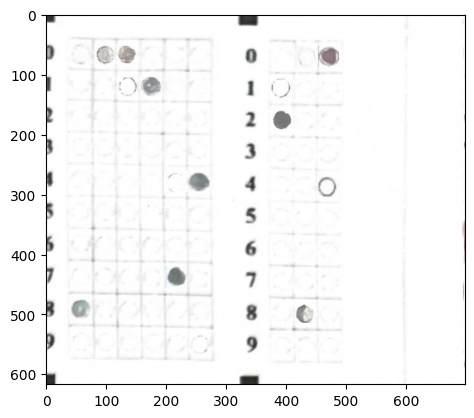

In [9]:
plt.imshow(cropped_images[00])

In [38]:
cropped_infor

[(1556, 385, 2255, 1002),
 (81, 1064, 594, 1713),
 (590, 1058, 1101, 1712),
 (1097, 1054, 1605, 1712),
 (1605, 1054, 2102, 1712),
 (80, 1721, 591, 2129),
 (594, 1713, 1101, 2120),
 (1101, 1712, 1611, 2125),
 (1605, 1712, 2109, 2119),
 (74, 2140, 755, 2949),
 (760, 2124, 1435, 2939),
 (1435, 2119, 2109, 2939)]

In [6]:
def test_image(img):
    cropped_images, cropped_infor = su.segmentation_test_set(img)
    resized_images = []
    for image in cropped_images:
        resized_images.append(cv2.resize(image, (640,640), interpolation=cv2.INTER_LINEAR))
    
    return resized_images

In [7]:
resized_images = test_image(img)

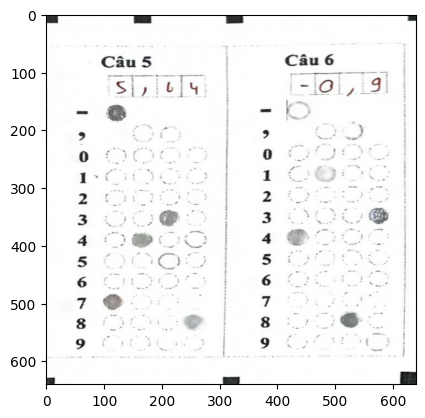

In [18]:
plt.imshow(resized_images[11])

In [35]:
cv2.imwrite("part1.jpg", resized_images[1])

True


0: 640x640 9 pointeds, 81 unpointeds, 797.8ms
Speed: 9.5ms preprocess, 797.8ms inference, 26.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'pointed', 1: 'unpointed'}
obb: None
orig_img: array([[[ 59,  61,  61],
        [ 58,  60,  60],
        [ 58,  60,  60],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 255, 253]],

       [[ 60,  63,  61],
        [ 59,  62,  60],
        [ 59,  61,  61],
        ...,
        [255, 255, 254],
        [254, 255, 253],
        [255, 254, 253]],

       [[ 60,  63,  61],
        [ 59,  62,  60],
        [ 59,  61,  61],
        ...,
        [255, 255, 254],
        [253, 254, 252],
        [255, 253, 252]],

       ...,

       [[ 51,  52,  50],
        [ 51,  52,  50],
        [ 52,  53,  51

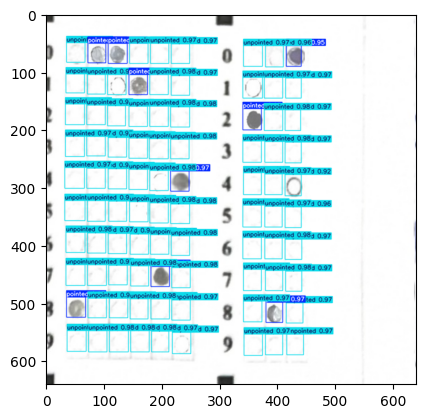

In [8]:


from PIL import Image
import cv2
from ultralytics import YOLO

model = YOLO(r"C:\Users\huyho\OneDrive\Desktop\autograde\yolov8m_50epochs.pt")  #thay đường dẫn cho model

# img = cv2.imread(r"C:\Users\huyho\OneDrive\Desktop\autograde\process_testset1\part0.jpg") #đường dẫn ảnh test
img = resized_images[0]
prediction = model.predict(img,save_txt=True)[0]
print(prediction)

prediction = prediction.plot(line_width=1)
prediction = prediction[:, :, ::-1]
prediction = Image.fromarray(prediction)
plt.imshow(prediction)

In [50]:
results = model(resized_images[1], save_txt = True, project= "D:/predict")


0: 640x640 10 pointeds, 30 unpointeds, 354.0ms
Speed: 5.4ms preprocess, 354.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to D:\predict\predict
1 label saved to D:\predict\predict\labels


In [10]:
def count_shape(info_image):
    width = info_image[2] - info_image[0]
    height = info_image[3] - info_image[1]

    return (width, height)

In [37]:
def reverse_file_label(dir,file,infor_origin, label_path, scale = (640, 640)):
    image = cv2.imread(f"{dir}/{file}")
    height_image, width_image, _ = image.shape
    height, width = scale[1], scale[0]
    
    with open(label_path, 'r') as f:
        labels = f.readlines()
    with open(f"{file[-4]}.txt", "a") as file:
        for label in labels:
            parts = label.strip().split()
            class_id = int(parts[0])

            x_center, y_center, bbox_width, bbox_height = map(float, parts[1:])

            x_center *= width
            y_center *= height 
            bbox_width *= width 
            bbox_height *= height 
            
            x_min_origin = infor_origin[0]
            y_min_origin = infor_origin[1]

            origin_crop_shape = count_shape(infor_origin)

            width_crop = origin_crop_shape[0]
            height_crop = origin_crop_shape[1]

            width_ratio = width_crop / width 
            height_ratio = height_crop / height 

            x_center *= width_ratio
            y_center *= height_ratio 
            bbox_width *= width_ratio 
            bbox_height *= height_ratio 

            # x_center /= width_crop 
            # y_center /= height_crop 
            # bbox_width /= width_crop
            # bbox_height /= height_crop 
        
            x_center = (x_center + x_min_origin) / width_image
            y_center = (y_center + y_min_origin) / height_image

            bbox_width /= width_image
            bbox_height /= height_image

            file.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")



In [45]:
image_path =r"C:\Users\huyho\OneDrive\Desktop\autograde\testset1\images\IMG_3960_iter_0.jpg"
label_path = r"C:\Users\huyho\OneDrive\Desktop\autograde\process_testset1\runs\detect\predict\labels\part1.txt"
reverse_file_label(image_path, cropped_infor[1], label_path, scale = (640, 640))

In [32]:
cv2.imwrite("crop_part1.jpg", cropped_images[0])

True

In [8]:
model = YOLO(r"C:\Users\huyho\OneDrive\Desktop\autograde\yolov8m_50epochs.pt")

NameError: name 'YOLO' is not defined

In [5]:
dir_image = r"D:/testset1/images"  #thay bằng thử mục chứa ảnh gốcgốc

dir_save_image = "D:/cropped_test_set"
for file in os.listdir(dir_image)[:500]:
    image = cv2.imread(f"{dir_image}/{file}")
    cropped_images, cropped_infor = su.segmentation_test_set(image)

    try:
        for i in range(len(cropped_images)):
            cropped_image = cv2.resize(cropped_images[i], (640,640), interpolation=cv2.INTER_LINEAR)
            cv2.imwrite(f"{dir_save_image}/{file[:-4]}_{i}.jpg",cropped_image)
    except:
        continue

In [ ]:
dir_save_image = "D:/cropped_test_set"
model = YOLO(r"D:\process_testset1\yolov11l_100epochs.pt")
for file in os.listdir(dir_save_image):
    try:
        results = model(f"{dir_save_image}/{file}", save_txt = True, project= "D:/predict", name = file)
    except:
        continue 
    


image 1/1 D:\cropped_test_set\IMG_3960_iter_0_0.jpg: 640x640 10 pointeds, 81 unpointeds, 2638.0ms
Speed: 26.4ms preprocess, 2638.0ms inference, 33.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to D:\predict\IMG_3960_iter_0_0.jpg
1 label saved to D:\predict\IMG_3960_iter_0_0.jpg\labels

image 1/1 D:\cropped_test_set\IMG_3960_iter_0_1.jpg: 640x640 10 pointeds, 30 unpointeds, 2640.8ms
Speed: 7.0ms preprocess, 2640.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to D:\predict\IMG_3960_iter_0_1.jpg
1 label saved to D:\predict\IMG_3960_iter_0_1.jpg\labels

image 1/1 D:\cropped_test_set\IMG_3960_iter_0_10.jpg: 640x640 10 pointeds, 77 unpointeds, 2603.9ms
Speed: 9.0ms preprocess, 2603.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to D:\predict\IMG_3960_iter_0_10.jpg
1 label saved to D:\predict\IMG_3960_iter_0_10.jpg\labels

image 1/1 D:\cropped_test_set\IMG_3960_iter_0_11.jpg: 640x640 9 pointeds, 77 un

In [ ]:
dir_image = r"C:/Users/huyho/OneDrive/Desktop/autograde/testset1/images"
dir_label = r"D:/predict22"
for file in os.listdir(dir_image): 
    try:
        image = cv2.imread(f"{dir_image}/{file}")
        cropped_images, cropped_infor = su.segmentation_test_set(image)
        for i in range(len(cropped_images)):
            reverse_file_label(image = cropped_images[i], file_path = f"D:/result/{file[-4]}.txt", infor_origin=cropped_infor[i], label_path = f"D:/predict22/{file[-4]}_{i}.jpg/labels/{file[-4]}_{i}.txt" )
            
    except:
        continue